In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings


In [148]:
data_climate = pd.read_csv('data_fortaleza-CE.csv')
data_climate.head()

codigo_estacao        data  hora  temp_inst  temp_max  temp_min  umid_inst  \
0           A305  12/05/2019    13       30.4      30.4      29.0         67   
1           A305  12/05/2019    11       28.4       NaN       NaN         76   
2           A305  12/05/2019    14       30.9      31.0      29.6         58   
3           A305  12/05/2019    12       29.0      29.7      28.3         72   
4           A305  12/05/2019    15       32.1      32.3      30.9         55   

   umid_max  umid_min  pto_orvalho_inst  pto_orvalho_max  pto_orvalho_min  \
0      73.0      64.0              23.5             24.1             22.2   
1       NaN       NaN              23.7              NaN              NaN   
2      67.0      58.0              21.7             23.4             21.7   
3      76.0      68.0              23.5             24.3             22.8   
4      60.0      53.0              22.1             23.4             21.2   

   pressao  pressao_max  pressao_min  vento_direcao  vento_vel   vento_rajada  \
0   1009.7       1010.1       1009.7            2.9        140            7.6   
1   1009.6          NaN          NaN            2.3        152            NaN   
2   1009.1       1009.7       1009.1            3.0        139            8.3   
3   1010.0       1010.0       1009.6            2.8        137            6.7   
4   1008.3       1009.1       1008.2            2.8        148            8.2   

   radiacao  precipitacao  
0    1524.0           0.6  
1     171.6           0.0  
2    1643.0           0.0  
3    1319.0           0.0  
4    2150.0           0.0

In [149]:
data_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 20 columns):
codigo_estacao      1905 non-null object
data                1905 non-null object
hora                1905 non-null int64
temp_inst           1905 non-null float64
temp_max            1904 non-null float64
temp_min            1904 non-null float64
umid_inst           1905 non-null int64
umid_max            1904 non-null float64
umid_min            1904 non-null float64
pto_orvalho_inst    1905 non-null float64
pto_orvalho_max     1904 non-null float64
pto_orvalho_min     1904 non-null float64
pressao             1905 non-null float64
pressao_max         1904 non-null float64
pressao_min         1904 non-null float64
vento_direcao       1905 non-null float64
vento_vel           1905 non-null int64
 vento_rajada       1904 non-null float64
radiacao            1905 non-null float64
precipitacao        1905 non-null float64
dtypes: float64(15), int64(3), object(2)
memory usage: 297.8+

In [150]:
data_climate.columns = ['codigo_estacao','data','hora','temp_inst','temp_max','temp_min','umid_inst','umid_max','umid_min','pto_orvalho_inst','pto_orvalho_max','pto_orvalho_min','pressao','pressao_max','pressao_min','vento_direcao','vento_vel','vento_rajada','radiacao','precipitacao']
data_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 20 columns):
codigo_estacao      1905 non-null object
data                1905 non-null object
hora                1905 non-null int64
temp_inst           1905 non-null float64
temp_max            1904 non-null float64
temp_min            1904 non-null float64
umid_inst           1905 non-null int64
umid_max            1904 non-null float64
umid_min            1904 non-null float64
pto_orvalho_inst    1905 non-null float64
pto_orvalho_max     1904 non-null float64
pto_orvalho_min     1904 non-null float64
pressao             1905 non-null float64
pressao_max         1904 non-null float64
pressao_min         1904 non-null float64
vento_direcao       1905 non-null float64
vento_vel           1905 non-null int64
vento_rajada        1904 non-null float64
radiacao            1905 non-null float64
precipitacao        1905 non-null float64
dtypes: float64(15), int64(3), object(2)
memory usage: 297.8+

In [151]:
'''
                                    USING KNN ALGORITHM(CLASSIFICATION)

'''

'\n                                    USING KNN ALGORITHM(CLASSIFICATION)\n\n'

In [152]:
data_for_knn = pd.DataFrame(data_climate[['hora','temp_inst','umid_inst','pto_orvalho_inst','pressao','vento_rajada','vento_direcao','vento_vel']])
data_for_knn.head()

hora  temp_inst  umid_inst  pto_orvalho_inst  pressao  vento_rajada  \
0    13       30.4         67              23.5   1009.7           7.6   
1    11       28.4         76              23.7   1009.6           NaN   
2    14       30.9         58              21.7   1009.1           8.3   
3    12       29.0         72              23.5   1010.0           6.7   
4    15       32.1         55              22.1   1008.3           8.2   

   vento_direcao  vento_vel  
0            2.9        140  
1            2.3        152  
2            3.0        139  
3            2.8        137  
4            2.8        148

In [153]:
data_for_knn.shape

(1905, 8)

In [154]:
len_validation = len(data_for_knn)
len_validation

1905

In [155]:
set_validation = data_for_knn[:381]

set_test_train = data_for_knn[381:]
print(set_validation.shape)
print(set_test_train.shape)

(381, 8)
(1524, 8)


In [156]:
x = set_test_train[['vento_rajada','vento_direcao']]
y = set_test_train[['vento_vel']]
x_validation = set_validation[['vento_rajada','vento_direcao']]
y_validation = set_validation[['vento_vel']]
print(x.shape)
print(y.shape)
print(x_validation.shape)
print(y_validation.shape)

(1524, 2)
(1524, 1)
(381, 2)
(381, 1)


In [249]:
def knn_test(x,y):
  
    train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,
                                                shuffle=False)
    knn = KNeighborsClassifier(n_neighbors = 100)
    knn.fit(train_x,train_y)
    predicts = knn.predict(test_x)
    
    acc = accuracy_score(test_y,predicts)
    rmse = math.sqrt(mean_squared_error(test_y, predicts))
    
    #test_y = np.array(test_y).reshape(1,-1)
    return acc,rmse,test_y,predicts
                                                                    


In [256]:
warnings.filterwarnings('ignore')

acc = knn_test(x,y)[0]
rmse = knn_test(x,y)[1]

print('Melhor acurácia -> {}%'.format(acc*100))
print('Melhor RMSE     -> {}'.format(rmse))

Melhor acurácia -> 1.639344262295082%
Melhor RMSE     -> 36.32368147731688


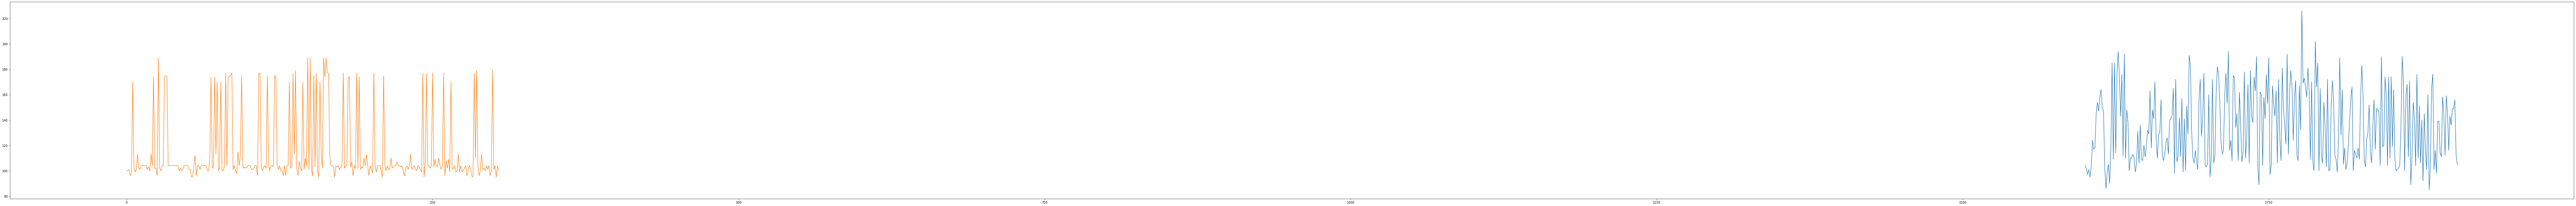

In [252]:
plt.plot(knn_test(x,y)[2])
plt.plot(knn_test(x,y)[3])
plt.show()

In [54]:
'''
                            USING RNN -> LSTM WITH THE WINDOW METHOD ALGORITHM(NEURAL NETWORKS) 
'''

'\n                            USING RNN -> LSTM WITH THE WINDOW METHOD ALGORITHM(NEURAL NETWORKS) \n'

In [55]:
#fix random seed for reproducibility
numpy.random.seed(7)

In [56]:
#using neural networks recurrents
#network short memory with LSTM, she use backpropagation through time and have memory block instead neruons.
dataset = pd.DataFrame(data_climate[['hora','temp_inst','umid_inst','pto_orvalho_inst','pressao','vento_rajada','vento_direcao','vento_vel']])
dataset = dataset.values
dataset = dataset.astype('float32')
dataset

array([[ 13. ,  30.4,  67. , ...,   7.6,   2.9, 140. ],
       [ 11. ,  28.4,  76. , ...,   nan,   2.3, 152. ],
       [ 14. ,  30.9,  58. , ...,   8.3,   3. , 139. ],
       ...,
       [  9. ,  23.3,  83. , ...,   6.1,   2.3, 156. ],
       [ 17. ,  29.4,  50. , ...,   9.7,   4.2, 113. ],
       [  0. ,  25.9,  80. , ...,   4.7,   1.3, 105. ]], dtype=float32)

In [57]:
#To reduce the data from [0,1] scale with pre-preprocessing
#Normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.5652174 , 0.8380954 , 0.5       , ..., 0.601626  , 0.5178572 ,
        0.34317344],
       [0.47826087, 0.64761925, 0.673077  , ...,        nan, 0.4107143 ,
        0.38745385],
       [0.6086957 , 0.8857143 , 0.32692313, ..., 0.6585366 , 0.53571427,
        0.33948338],
       ...,
       [0.39130434, 0.16190481, 0.8076923 , ..., 0.47967476, 0.4107143 ,
        0.402214  ],
       [0.73913044, 0.7428572 , 0.17307693, ..., 0.7723577 , 0.75      ,
        0.24354245],
       [0.        , 0.40952396, 0.75      , ..., 0.3658536 , 0.23214285,
        0.21402214]], dtype=float32)

In [58]:
#split into train and test sets
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train,test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train),len(test))

1276 629


In [59]:
'''
To define a new dataset
args : the olg dataset(np array),
       look_back(you select times before and number steps for prevent the next period)
'''
# convert an array of values into a dataset matrix
def create_new_dataset(dataset,look_back=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return numpy.array(dataX),numpy.array(dataY)

In [60]:
#In this new_dataset, the fisrt columns is X=t and second is Y=t+1
new_dataset = create_new_dataset(dataset)
new_dataset

(array([[0.5652174 ],
        [0.47826087],
        [0.6086957 ],
        ...,
        [0.43478262],
        [0.47826087],
        [0.39130434]], dtype=float32),
 array([0.47826087, 0.6086957 , 0.5217391 , ..., 0.47826087, 0.39130434,
        0.73913044], dtype=float32))

In [61]:
#reshape into X = t and Y = t+1
look_back = 1
trainX,trainY = create_new_dataset(train,look_back)
testX,testY = create_new_dataset(test,look_back)

In [62]:
'''
LSTM needs the X(inputs) args this form: [samples,time steps, features], 
now the data is = [samples,features], we uses the numpy.reshape() for reshape
'''
#reshape input to be [samples,time steps, features]
trainX = numpy.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = numpy.reshape(testX,(testX.shape[0],1,testX.shape[1]))

print("{}||{}".format(trainX[1],testX[1]))
print("{}||{}".format(trainX.shape,testX.shape))

[[0.47826087]]||[[0.39130434]]
(1274, 1, 1)||(627, 1, 1)


In [64]:
'''
Now, the LSTM!!!

LSTM needs 3 layers : 1ºinput layer
                      2ºhidden layer with 4 LSTM blocks or neural
                      3ºoutput layer

 - General is just one output;
 - Sigmoid function is used for LSTM blocks;
 - For default, is 100 epoch by train.
'''

#create and fir the LSTM network
model = Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=20,batch_size=1,verbose=2)

warnings.filterwarnings('ignore')

Epoch 1/20
 - 5s - loss: 0.0832
Epoch 2/20
 - 4s - loss: 0.0522
Epoch 3/20
 - 4s - loss: 0.0503
Epoch 4/20
 - 5s - loss: 0.0501
Epoch 5/20
 - 4s - loss: 0.0496
Epoch 6/20
 - 5s - loss: 0.0498
Epoch 7/20
 - 4s - loss: 0.0498
Epoch 8/20
 - 4s - loss: 0.0500
Epoch 9/20
 - 4s - loss: 0.0497
Epoch 10/20
 - 4s - loss: 0.0496
Epoch 11/20
 - 4s - loss: 0.0498
Epoch 12/20
 - 4s - loss: 0.0497
Epoch 13/20
 - 4s - loss: 0.0494
Epoch 14/20
 - 4s - loss: 0.0495
Epoch 15/20
 - 4s - loss: 0.0493
Epoch 16/20
 - 4s - loss: 0.0494
Epoch 17/20
 - 4s - loss: 0.0493
Epoch 18/20
 - 4s - loss: 0.0496
Epoch 19/20
 - 4s - loss: 0.0493
Epoch 20/20
 - 4s - loss: 0.0494


In [100]:
#Try inverse predictions

#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

'''
#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
'''

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 0.22 RMSE
Test Score: 0.31 RMSE


In [101]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [102]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

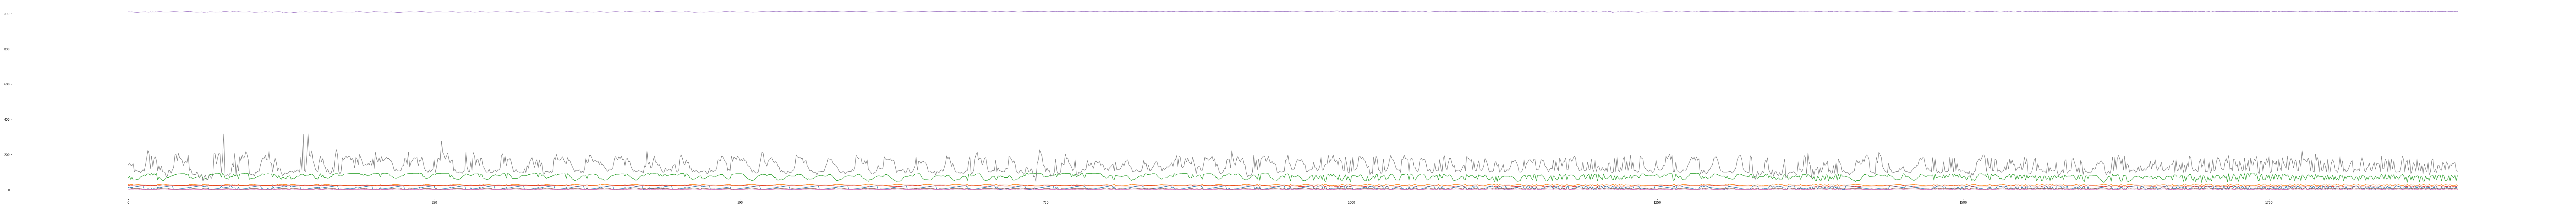

In [103]:
# plot baseline and predictions
plt.rcParams['figure.figsize'] = (152,12)
plt.plot(scaler.inverse_transform(dataset))

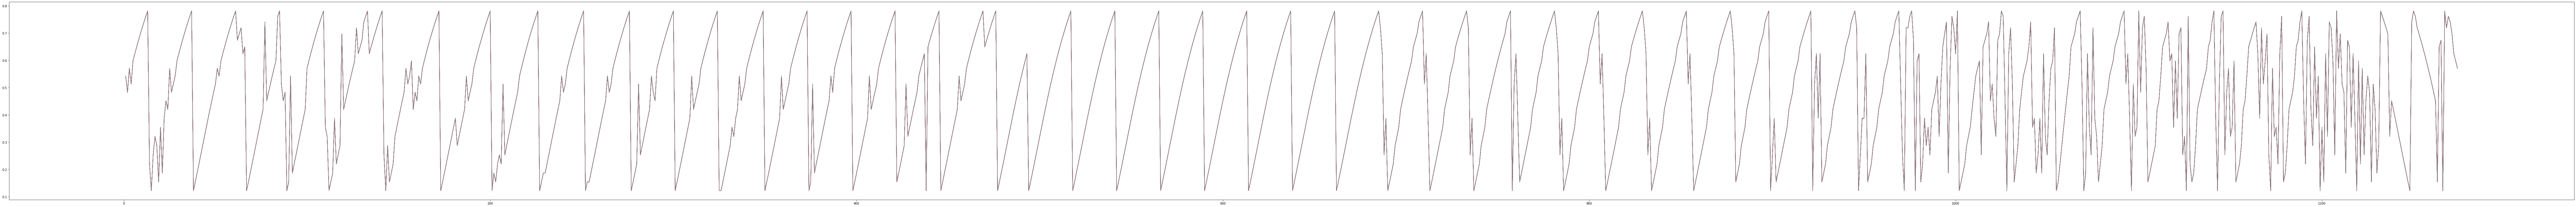

In [104]:
plt.plot(trainPredictPlot)

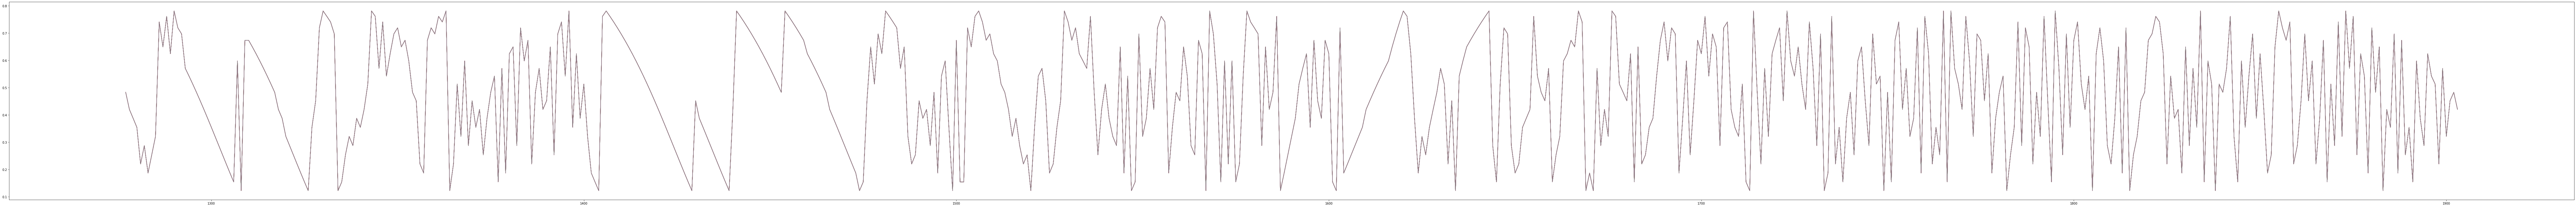

In [105]:
plt.plot(testPredictPlot)

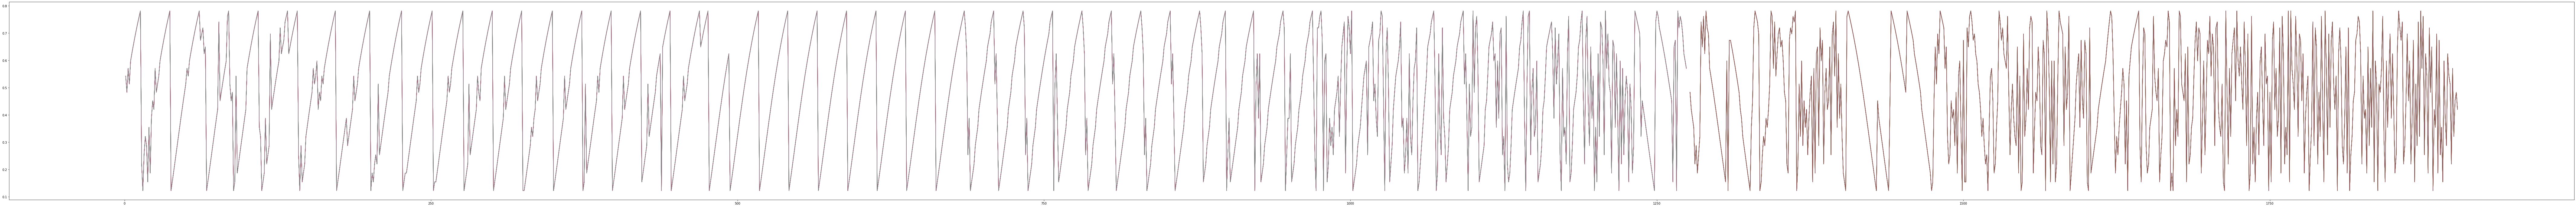

In [74]:
# Union train and test
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot,'-')
plt.show()